In [ ]:
import pandas as pdpd
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive tr
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/daily_weather.csv')

In [ ]:
data.head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
data.shape

(1095, 11)

In [ ]:
data[data.isnull().any(axis=1)].head()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.0,0.0,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.0,0.0,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.0,0.0,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.0,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.0,0.0,52.580000,54.030000


In [ ]:
del data['number']

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(1064, 10)

In [ ]:
clean_data=data.copy()

In [ ]:
clean_data['relative_humidity_3pm']

0       36.160000
1       19.426597
2       14.460000
3       12.742547
4       76.740000
          ...    
1090    38.180000
1091    73.340000
1092    52.310000
1093    58.280000
1094    15.100000
Name: relative_humidity_3pm, Length: 1064, dtype: float64

In [ ]:
clean_data['high_humidity_label']=(clean_data['relative_humidity_3pm']>28)*1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int64

In [ ]:
y=clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [ ]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am','relative_humidity_9am']

In [ ]:
x = clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am'],
      dtype='object')

In [ ]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
y_predicted = humidity_classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predicted)

0.8892045454545454

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[166,  14],
       [ 25, 147]])

In [ ]:
from sklearn.tree import plot_tree

[Text(0.45454545454545453, 0.9166666666666666, 'x[8] <= 28.364\ngini = 0.496\nsamples = 712\nvalue = [388, 324]'),
 Text(0.2727272727272727, 0.75, 'x[8] <= 19.955\ngini = 0.239\nsamples = 419\nvalue = [361, 58]'),
 Text(0.18181818181818182, 0.5833333333333334, 'gini = 0.103\nsamples = 311\nvalue = [294, 17]'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[0] <= 917.284\ngini = 0.471\nsamples = 108\nvalue = [67, 41]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[4] <= 130.6\ngini = 0.432\nsamples = 38\nvalue = [12, 26]'),
 Text(0.18181818181818182, 0.25, 'x[4] <= 72.8\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.227\nsamples = 23\nvalue = [3, 20]'),
 Text(0.45454545454545453, 0.4166666666666667, 'gini = 0.337\nsamples = 70\nvalue = [55, 15]'),
 Text(0.6

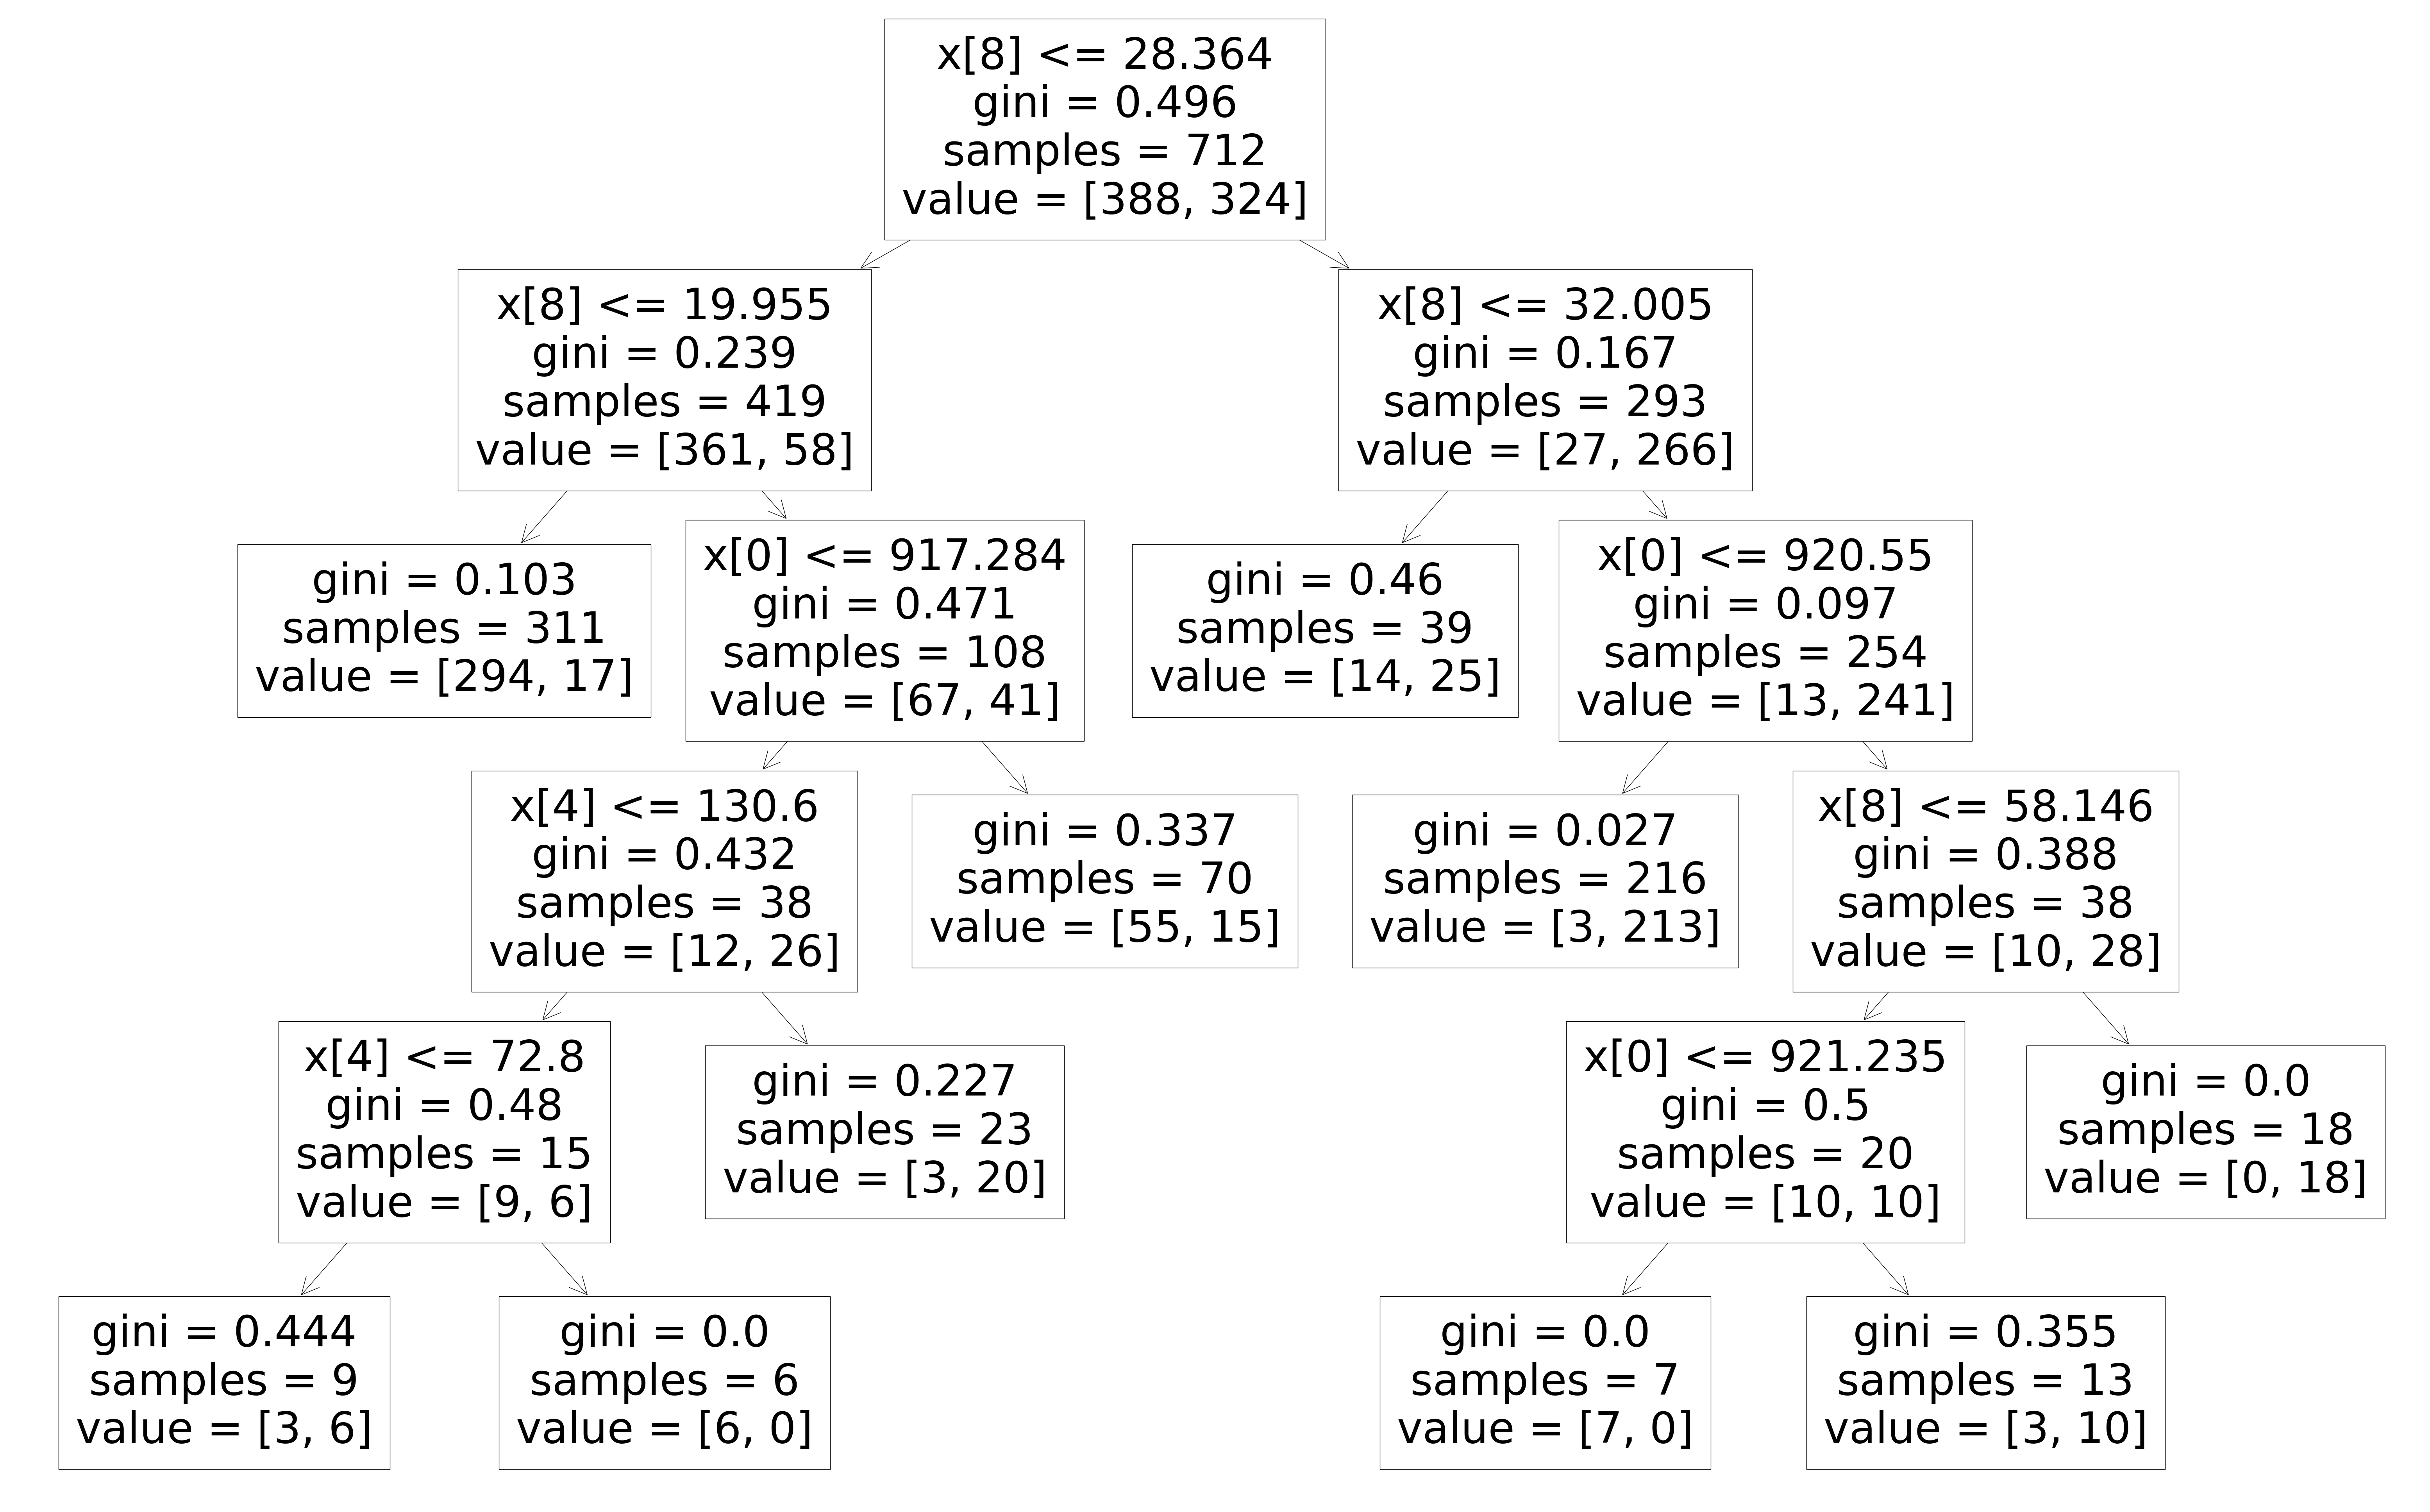

In [ ]:
from matplotlib.pylab import  rcParams
rcParams['figure.figsize'] = 80,50
plot_tree(humidity_classifier)